## simple linear regression 

### importing libs

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### importing data file

In [20]:
df = pd.read_csv('FuelConsumptionCO2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [21]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [22]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


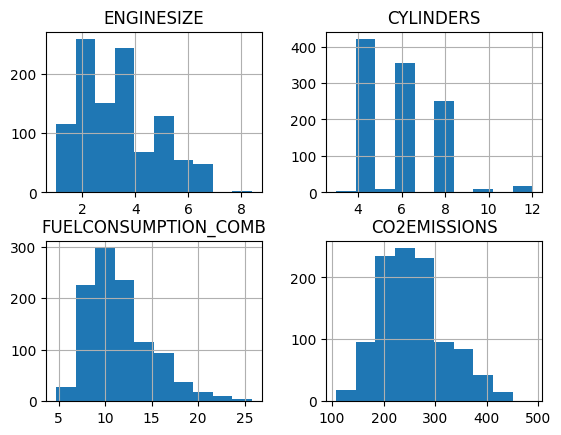

In [23]:
vis = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
vis.hist()
plt.show()

In [24]:
arr = np.array([cdf.ENGINESIZE , cdf.CYLINDERS, cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS])
color = np.array(['blue','green','red'])
labels = np.array(['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS'])

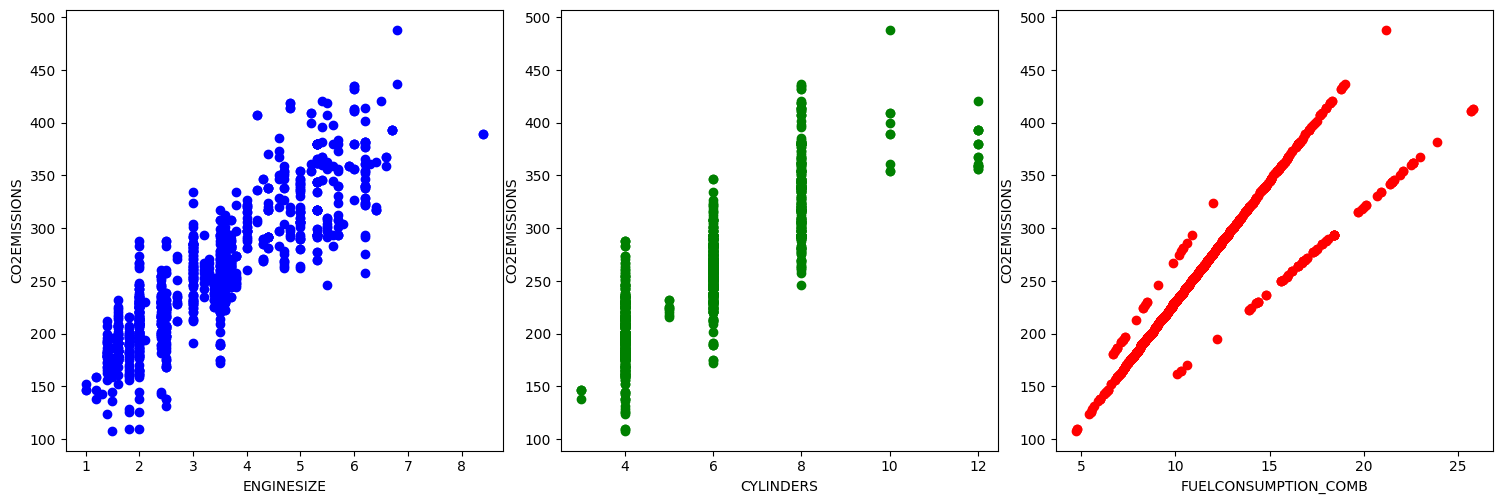

In [25]:
figure, axis = plt.subplots(1, 3 , figsize=(15, 5))
figure.tight_layout()

for i in range(3):
    axis[i].scatter(arr[i] , arr[3], color = color[i] )
    axis[i].set_xlabel(labels[i])
    axis[i].set_ylabel(labels[3])

In [95]:
msk = np.random.rand(len(cdf)) < 0.85
train = cdf[msk]
test = cdf[~msk]
print(test)
print(train)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
1            2.4          4                   9.6           221
3            3.5          6                  11.1           255
9            2.4          4                   9.2           212
16           4.7          8                  14.7           338
27           3.0          6                   8.3           224
...          ...        ...                   ...           ...
988          1.5          4                   4.7           108
993          5.7          8                  16.7           384
1024         2.0          4                   7.3           197
1027         2.0          4                   9.8           225
1048         2.0          4                   7.1           192

[158 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
2            1.5          4                   5.9           136
4            3.5

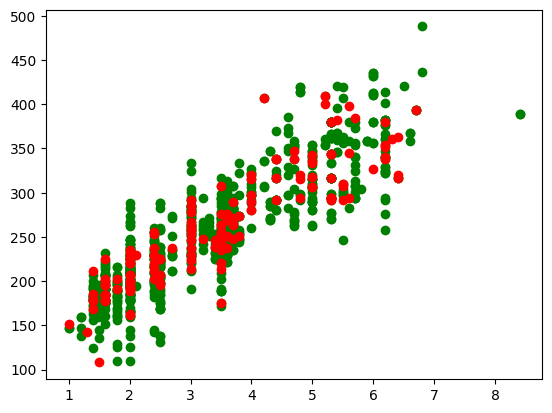

In [96]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(train.ENGINESIZE , train.CO2EMISSIONS ,color = 'green')
ax1.scatter(test.ENGINESIZE , test.CO2EMISSIONS ,color = 'red')
ax1.set_autoscale_on(1)

In [97]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x , train_y)

LinearRegression()

In [98]:
print('coefficient = ', regr.coef_ , 'intercept = ' , regr.intercept_)

coefficient =  [[39.38175467]] intercept =  [124.57100864]


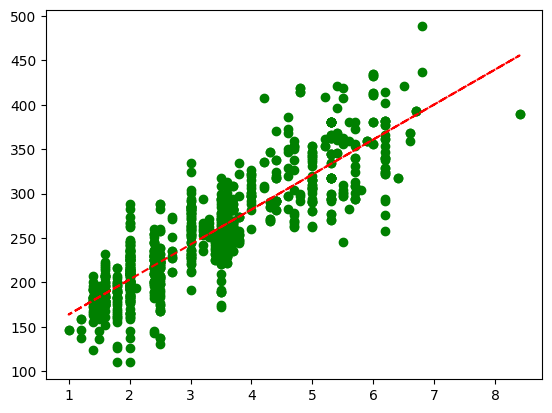

In [99]:
plot.scatter(train.ENGINESIZE , train.CO2EMISSIONS ,color = 'green')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '--r')

In [100]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_1 = regr.predict(test_x)

print("mean absolute error: %2f" % np.mean(np.absolute(test_y_1 - test_y)))
print("residual sum of squeres (MSE): %2f" % np.mean(np.absolute(test_y_1 - test_y)**2))
print("R2-Score: %2f" % r2_score(test_y_1 , test_y))

mean absolute error: 20.847719
residual sum of squeres (MSE): 785.778683
R2-Score: 0.765872


# Multiple regression model

In [105]:
regr2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
regr2.fit(train_x2 , train_y2)
print(regr2.coef_ , regr2.intercept_)

[[10.97103173  7.14815541  9.80989393]] [64.52902508]


In [106]:
test_x2 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])

test_y_2 = regr2.predict(test_x2)

print("mean absolute error: %2f" % np.mean(np.absolute(test_y_2 - test_y)))
print("residual sum of squeres (MSE): %2f" % np.mean(np.absolute(test_y_2 - test_y)**2))
print("R2-Score: %2f" % r2_score(test_y_2 , test_y))

mean absolute error: 15.193012
residual sum of squeres (MSE): 474.607487
R2-Score: 0.868624
